#  Stack Overflow Survey results from 2017 to 2020.

> In this project I will retrieve the last four [Stack Overflow Survey results](https://insights.stackoverflow.com/survey). 

EDA on 2011-2020 data coming soon


## Business Questions

- How had an individual's job satisfaction changed over the years?

- What are the changes in salaries and job satisfaction for data scientists?
 
- Does race and gender or education level matter more to an individual's salary?



## Data Understanding

 > To complete this project we need to collect the results of the last four years. And then follow a data wrangling prosses. 

#### Data wrangling consists of: <br>
>1- Gathering data <br>
>2- Assessing data <br>
>3- Cleaning data <br>
>4- Storing, analyzing, and visualizing wrangled data <br><br>

#### Gathering data

In [1]:
#Importing backages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import plotly.graph_objects as go

In [2]:
#Stack Overflow  Syrvey result from 2017 to 2020 
df_17 = pd.read_csv('data/developer_survey_2017/survey_results_public.csv')
df_18 = pd.read_csv('data/developer_survey_2018/survey_results_public.csv',low_memory=False)
df_19 = pd.read_csv('data/developer_survey_2019/survey_results_public.csv')
df_20 = pd.read_csv('data/developer_survey_2020/survey_results_public.csv')

In [3]:
#creating a columns contains the year 
#later these data sets will be combained
df_17['year'] = 2017
df_18['year'] = 2018
df_19['year'] = 2019
df_20['year'] = 2020


#### Assessing data
> Looking through each set to decide on the main features that can be used in the analysis.

In [4]:
#2017 data set 
df_17.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,year
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,2017
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0,2017
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,2017
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,2017
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [5]:
#2018 
df_18.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,year
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy,2018
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,2018
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy,2018
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,2018


In [6]:
#2019 
df_19.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,year
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,2019
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,2019
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult,2019
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,2019
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy,2019


In [7]:
#2020 
df_20.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,year
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27,2020
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4,2020
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN,2020
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4,2020
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8,2020


#### Quality Issues 
> There are some issues that needed to be fixed.


- Rename columns to compare these data easly.
- Handling missing values.
- Selecting interesting columns.


#### Selecting interesting columns
Since that the goal of this project is to compare the four years data to gain insights, only the common columns are useful.<br> 

The selected columns are :
- Programming as a Hobby
- Country
- Employment Status
- Have Worked Language
- Want Work Language
- Have Worked Database
- Want Work Database
- Have Worked Platform
- Want Work Platform
- Formal Education
- Years Coded Job
- Years Coded JobPast
- Job Satisfaction
- Developer Type


## Data Cleaning and Preparation


### ` Developer Survey Results 2017`

> Most of the columns needed to be renamed.

In [8]:
#Rename columns of 2017
df_17.rename(columns={'ProgramHobby': "Hobbyist", 'FormalEducation': 'EdLevel',
                      'HaveWorkedLanguage':'LanguageWorkedWith','YearsProgram':'YearsCode',
                      'WantWorkLanguage':'LanguageDesireNextYear','YearsCodedJob':'YearsCodePro', 
                    'HaveWorkedDatabase':'DatabaseWorkedWith','WantWorkDatabase':'DatabaseDesireNextYear',
                    'HaveWorkedPlatform':'PlatformWorkedWith','WantWorkPlatform':'PlatformDesireNextYear',
                      'JobSatisfaction':'JobSat', 'EmploymentStatus':'Employment','Salary':'ConvertedComp',
                      'DeveloperType':'DevType','Race':'Ethnicity','MajorUndergrad':'UndergradMajor'},inplace = True)

In [9]:
#selecting columns
df_17 = df_17[['Respondent', 'Hobbyist', 'Country', 'Employment', 'EdLevel',
       'YearsCode', 'YearsCodePro', 'DevType', 'JobSat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Gender','year','ConvertedComp','Ethnicity','UndergradMajor']]

In [10]:
#Test the change
df_17.head()

,Respondent,Hobbyist,Country,Employment,EdLevel,YearsCode,YearsCodePro,DevType,JobSat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,Gender,year,ConvertedComp,Ethnicity,UndergradMajor
0,1,"Yes, both",United States,"Not employed, and not looking for work",Secondary school,2 to 3 years,NaN,NaN,NaN,Swift,Swift,NaN,NaN,iOS,iOS,Male,2017,NaN,White or of European descent,NaN
1,2,"Yes, both",United Kingdom,Employed part-time,Some college/university study without earning ...,9 to 10 years,NaN,NaN,NaN,JavaScript; Python; Ruby; SQL,Java; Python; Ruby; SQL,MySQL; SQLite,MySQL; SQLite,Amazon Web Services (AWS),Linux Desktop; Raspberry Pi; Amazon Web Servic...,Male,2017,NaN,White or of European descent,Computer science or software engineering
2,3,"Yes, both",United Kingdom,Employed full-time,Bachelor's degree,20 or more years,20 or more years,Other,9.0,Java; PHP; Python,C; Python; Rust,MySQL,NaN,NaN,NaN,Male,2017,113750.0,White or of European descent,Computer science or software engineering
3,4,"Yes, both",United States,Employed full-time,Doctoral degree,14 to 15 years,9 to 10 years,NaN,3.0,Matlab; Python; R; SQL,Matlab; Python; R; SQL,MongoDB; Redis; SQL Server; MySQL; SQLite,MongoDB; Redis; SQL Server; MySQL; SQLite,Windows Desktop; Linux Desktop; Mac OS; Amazon...,Windows Desktop; Linux Desktop; Mac OS; Amazon...,Male,2017,NaN,White or of European descent,A non-computer-focused engineering discipline
4,5,"Yes, I program as a hobby",Switzerland,Employed full-time,Master's degree,20 or more years,10 to 11 years,Mobile developer; Graphics programming; Deskto...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,Computer science or software engineering


##### Jobsat

In [11]:
# all the other survey results rank job satisfaction with catagries instead of number 
#here the jobsat are numerical must be change into catagries 
#remove nan 
df_17['JobSat']=df_17['JobSat'].fillna(0)
#change the type
df_17['JobSat']= df_17['JobSat'].astype(int)
# create empty set 
def f(column):
    '''
    INPUT - 
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            list contian the desired changes
    '''
    JobSat = []
    for x in column: 
        if int(x) >= 1 and int(x) < 2:
            JobSat.append('Very dissatisfied')
        elif int(x) >= 2 and  int(x) <4:
            JobSat.append('Slightly dissatisfied')
        elif int(x) >= 4  and int(x) < 6:
            JobSat.append('Slightly satisfied')
        elif int(x) >= 6 :
            JobSat.append('Very satisfied')
        else :
            JobSat.append('Neither satisfied nor dissatisfied')
    return JobSat
    
    
df_17['JobSat']=f(df_17['JobSat']) 

In [12]:
#test
df_17['JobSat'].unique()

array(['Neither satisfied nor dissatisfied', 'Very satisfied',
       'Slightly dissatisfied', 'Slightly satisfied', 'Very dissatisfied'],
      dtype=object)

In [13]:
#unique values of hobbyist
df_17['Hobbyist'].unique()

array(['Yes, both', 'Yes, I program as a hobby', 'No',
       'Yes, I contribute to open source projects'], dtype=object)

> we can only use yes or no to simplify our data

In [14]:
# create an empty set
Hobbyist = []

for x in df_17['Hobbyist']: 
    if x == 'No' or x == 'Yes, both':
        Hobbyist.append('No')
    else : 
        Hobbyist.append('Yes')
# Create a column for the list
df_17['Hobbyist']= Hobbyist

In [15]:
#test 
df_17['Hobbyist'].unique()

array(['No', 'Yes'], dtype=object)

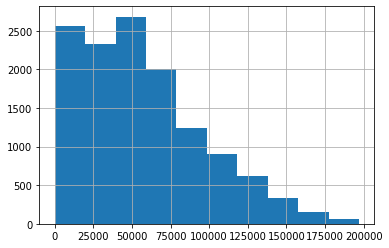

In [16]:
# the distribution of ConvertedComp in 2017
df_17['ConvertedComp'].hist()

In [17]:
#uniques values of YearsCodePro
df_20['YearsCodePro'].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [18]:
#uniques values of YearsCode
df_17['YearsCodePro'].unique()

array([nan, '20 or more years', '9 to 10 years', '10 to 11 years',
       '8 to 9 years', '7 to 8 years', '11 to 12 years', '15 to 16 years',
       '1 to 2 years', '3 to 4 years', '12 to 13 years',
       'Less than a year', '5 to 6 years', '16 to 17 years',
       '13 to 14 years', '6 to 7 years', '2 to 3 years', '17 to 18 years',
       '4 to 5 years', '14 to 15 years', '18 to 19 years',
       '19 to 20 years'], dtype=object)

> we can change these values from a range to single values

In [19]:
#change these values from a range to single values
df_17['YearsCodePro']=df_17['YearsCodePro'].astype(str)
df_17['YearsCodePro'] =df_17['YearsCodePro'].str.split(' ').str[0]
df_17['YearsCodePro'].unique()

array(['nan', '20', '9', '10', '8', '7', '11', '15', '1', '3', '12',
       'Less', '5', '16', '13', '6', '2', '17', '4', '14', '18', '19'],
      dtype=object)

In [20]:
#change these values from a range to single values
df_17['YearsCode']=df_17['YearsCode'].astype(str)
df_17['YearsCode'] =df_17['YearsCode'].str.split(' ').str[0]
df_17['YearsCode'].unique()

array(['2', '9', '20', '14', '6', '10', '13', '12', '15', '11', '8', '5',
       '18', '7', '1', '3', 'Less', '4', '17', '16', '19', 'nan'],
      dtype=object)

In [21]:
df_17['EdLevel'].value_counts()

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: EdLevel, dtype: int64

In [22]:
#test
df_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              51392 non-null  int64  
 1   Hobbyist                51392 non-null  object 
 2   Country                 51392 non-null  object 
 3   Employment              51392 non-null  object 
 4   EdLevel                 51392 non-null  object 
 5   YearsCode               51392 non-null  object 
 6   YearsCodePro            51392 non-null  object 
 7   DevType                 36125 non-null  object 
 8   JobSat                  51392 non-null  object 
 9   LanguageWorkedWith      36625 non-null  object 
 10  LanguageDesireNextYear  33771 non-null  object 
 11  DatabaseWorkedWith      29452 non-null  object 
 12  DatabaseDesireNextYear  25109 non-null  object 
 13  PlatformWorkedWith      29114 non-null  object 
 14  PlatformDesireNextYear  27884 non-null

### ` Developer Survey Results 2018`

In [23]:
#Fixing Salary column outliers
df_18["Salary"] = pd.to_numeric(df_18["Salary"], errors='coerce')
df_18=df_18[df_18.Salary< 1.0000000000000002e+6]
df_18["Salary"].describe()

count      48529.000000
mean       82896.502401
std       136335.601003
min            0.000000
25%         8000.000000
50%        50000.000000
75%        97000.000000
max      1000000.000000
Name: Salary, dtype: float64

In [24]:
#Rename columns of 2018
df_18.rename(columns={'Hobby': "Hobbyist", 'FormalEducation': 'EdLevel',
                      'YearsCoding':'YearsCode','YearsCodingProf':'YearsCodePro',
                      'JobSatisfaction':'JobSat','Salary':'ConvertedComp','RaceEthnicity':'Ethnicity'},inplace = True)

In [25]:
#selecting columns
df_18 = df_18[['Respondent', 'Hobbyist', 'Country', 'Employment', 'EdLevel',
       'YearsCode', 'YearsCodePro', 'DevType', 'JobSat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Gender','year','ConvertedComp','Ethnicity','UndergradMajor']]

In [26]:
#testing change
df_18.head()

,Respondent,Hobbyist,Country,Employment,EdLevel,YearsCode,YearsCodePro,DevType,JobSat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,Gender,year,ConvertedComp,Ethnicity,UndergradMajor
1,3,Yes,United Kingdom,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",30 or more years,18-20 years,Database administrator;DevOps specialist;Full-...,Moderately dissatisfied,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Male,2018,51000.0,White or of European descent,"A natural science (ex. biology, chemistry, phy..."
4,7,Yes,South Africa,Employed full-time,Some college/university study without earning ...,6-8 years,0-2 years,Data or business analyst;Desktop or enterprise...,Slightly satisfied,C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,Arduino;Windows Desktop or Server,Male,2018,260000.0,White or of European descent,"Computer science, computer engineering, or sof..."
5,8,Yes,United Kingdom,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",6-8 years,3-5 years,Back-end developer;Database administrator;Fron...,Moderately satisfied,Java;JavaScript;Python;TypeScript;HTML;CSS,C#;Go;Java;JavaScript;Python;SQL;TypeScript;HT...,MongoDB,PostgreSQL,Linux,Linux,Male,2018,30000.0,White or of European descent,"Computer science, computer engineering, or sof..."
6,9,Yes,United States,Employed full-time,Some college/university study without earning ...,9-11 years,0-2 years,Back-end developer;Front-end developer;Full-st...,Slightly satisfied,JavaScript;HTML;CSS,C;Go;JavaScript;Python;HTML;CSS,MongoDB,NaN,Linux,Linux,Male,2018,120000.0,White or of European descent,"Computer science, computer engineering, or sof..."
8,11,Yes,United States,Employed full-time,Some college/university study without earning ...,30 or more years,21-23 years,"Back-end developer;C-suite executive (CEO, CTO...",Moderately satisfied,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,Erlang;Go;Python;Rust;SQL,Redis;PostgreSQL;Amazon DynamoDB;Apache HBase;...,Redis;PostgreSQL;Amazon DynamoDB;Apache Hive;A...,Amazon Echo;AWS;iOS;Linux;Mac OS;Serverless,AWS;Linux;Mac OS;Serverless,Male,2018,250000.0,White or of European descent,Fine arts or performing arts (ex. graphic desi...


In [27]:
#uniques values of job sat
df_18['JobSat'].unique()

array(['Moderately dissatisfied', 'Slightly satisfied',
       'Moderately satisfied', 'Neither satisfied nor dissatisfied',
       'Slightly dissatisfied', 'Extremely dissatisfied', nan,
       'Extremely satisfied'], dtype=object)

In [28]:
#Here the job satisfaction ranked diffrently thsn the other results, instead of 7 catagories we need just five.
#change the values to match the other dfs
#create empty set
JobSat = []
#loop through the column
for x in df_18['JobSat']: 
    '''
    replace extremly and moderate with very and 
    '''
    if x == 'Extremely dissatisfied' or x== 'Moderately dissatisfied' :
        JobSat.append('Very dissatisfied')
    elif x == 'Slightly dissatisfied': 
        JobSat.append('Slightly dissatisfied')
    elif x == 'Slightly satisfied' :
        JobSat.append('Slightly satisfied')
    elif x==  'Extremely satisfied' or x== 'Moderately satisfied':
        JobSat.append('Very satisfied')
    else :
        JobSat.append('Neither satisfied nor dissatisfied')
# Create a column for the list
df_18['JobSat']= JobSat

In [29]:
#test
df_18['JobSat'].unique()

array(['Very dissatisfied', 'Slightly satisfied', 'Very satisfied',
       'Neither satisfied nor dissatisfied', 'Slightly dissatisfied'],
      dtype=object)

In [30]:
#uniques values of Hobbyist
df_18['Hobbyist'].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
#description of ConvertedComp
df_18['ConvertedComp'].describe()

count      48529.000000
mean       82896.502401
std       136335.601003
min            0.000000
25%         8000.000000
50%        50000.000000
75%        97000.000000
max      1000000.000000
Name: ConvertedComp, dtype: float64

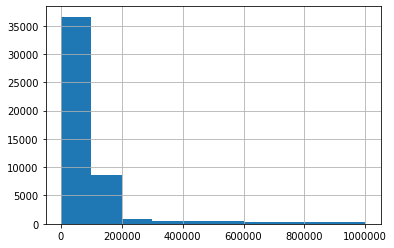

In [32]:
#hist of ConvertedComp
df_18['ConvertedComp'].hist()

In [33]:
df_18['YearsCode'].nunique()

11

In [34]:
df_18['YearsCode']=df_18['YearsCode'].astype(str)
df_18['YearsCode'] =df_18['YearsCode'].str.split('-').str[0]
df_18['YearsCode'].nunique()

12

In [35]:
df_18['YearsCodePro'].unique()

array(['18-20 years', '0-2 years', '3-5 years', '21-23 years',
       '12-14 years', '6-8 years', '9-11 years', '24-26 years',
       '15-17 years', '30 or more years', '27-29 years', nan],
      dtype=object)

In [36]:
df_18['YearsCodePro']=df_18['YearsCodePro'].astype(str)
df_18['YearsCodePro'] =df_18['YearsCodePro'].str.split('-').str[0]
df_18['YearsCodePro'].unique()

array(['18', '0', '3', '21', '12', '6', '9', '24', '15',
       '30 or more years', '27', 'nan'], dtype=object)

In [37]:
df_18['EdLevel'].value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              22798
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           11303
Some college/university study without earning a degree                                 6326
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     3343
Associate degree                                                                       1534
Other doctoral degree (Ph.D, Ed.D., etc.)                                              1223
Professional degree (JD, MD, etc.)                                                      640
Primary/elementary school                                                               452
I never completed any formal education                                                  193
Name: EdLevel, dtype: int64

In [38]:
#simplify the edlevel
#dropping nan values since that fillna is not usuful here and there is no avaliable method to replace missing value
df_18=df_18.dropna(subset=['EdLevel'])
df_18.loc[df_18['EdLevel'].str.contains("BA"), 'EdLevel'] = "Bachelor's degree"
df_18.loc[df_18['EdLevel'].str.contains("MA"), 'EdLevel'] = "Master's degree"
df_18.loc[df_18['EdLevel'].str.contains("Ph.D"), 'EdLevel'] = "Other doctoral degree"
df_18.loc[df_18['EdLevel'].str.contains("without"), 'EdLevel'] = "Some college/university study without earning a bachelor's degree"
df_18.loc[df_18['EdLevel'].str.contains("Associate degree"), 'EdLevel'] = "Associate degree"
df_18.loc[df_18['EdLevel'].str.contains("JD"), 'EdLevel'] = "Professional degree"
df_18.loc[df_18['EdLevel'].str.contains("Secondary school"), 'EdLevel'] = "Secondary school"


df_18['EdLevel'].value_counts()

Bachelor's degree                                                    34101
Some college/university study without earning a bachelor's degree     6326
Secondary school                                                      3343
Associate degree                                                      1534
Other doctoral degree                                                 1223
Professional degree                                                    640
Primary/elementary school                                              452
I never completed any formal education                                 193
Name: EdLevel, dtype: int64

In [39]:
#testing changes
df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47812 entries, 1 to 89965
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              47812 non-null  int64  
 1   Hobbyist                47812 non-null  object 
 2   Country                 47812 non-null  object 
 3   Employment              47658 non-null  object 
 4   EdLevel                 47812 non-null  object 
 5   YearsCode               47812 non-null  object 
 6   YearsCodePro            47812 non-null  object 
 7   DevType                 47476 non-null  object 
 8   JobSat                  47812 non-null  object 
 9   LanguageWorkedWith      46570 non-null  object 
 10  LanguageDesireNextYear  43987 non-null  object 
 11  DatabaseWorkedWith      40549 non-null  object 
 12  DatabaseDesireNextYear  35402 non-null  object 
 13  PlatformWorkedWith      40474 non-null  object 
 14  PlatformDesireNextYear  37925 non-null

### ` Developer Survey Results 2019`

In [40]:
#selecting columns
df_19 = df_19[['Respondent', 'Hobbyist', 'Country', 'Employment', 'EdLevel',
       'YearsCode', 'YearsCodePro', 'DevType', 'JobSat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Gender','year','ConvertedComp','Ethnicity','UndergradMajor']]

In [41]:

df_19.head()

,Respondent,Hobbyist,Country,Employment,EdLevel,YearsCode,YearsCodePro,DevType,JobSat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,Gender,year,ConvertedComp,Ethnicity,UndergradMajor
0,1,Yes,United Kingdom,"Not employed, and not looking for work",Primary/elementary school,4,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Man,2019,NaN,NaN,NaN
1,2,No,Bosnia and Herzegovina,"Not employed, but looking for work","Secondary school (e.g. American high school, G...",NaN,NaN,"Developer, desktop or enterprise applications;...",NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Man,2019,NaN,NaN,NaN
2,3,Yes,Thailand,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3,1,"Designer;Developer, back-end;Developer, front-...",Slightly satisfied,HTML/CSS,Elixir;HTML/CSS,PostgreSQL,PostgreSQL,NaN,NaN,Man,2019,8820.0,NaN,Web development or web design
3,4,No,United States,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3,Less than 1 year,"Developer, full-stack",Slightly satisfied,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,Man,2019,61000.0,White or of European descent,"Computer science, computer engineering, or sof..."
4,5,Yes,Ukraine,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",16,9,"Academic researcher;Developer, desktop or ente...",Slightly dissatisfied,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Couchbase;Firebase;MongoDB;MySQL;Oracle;Postgr...,Android;Linux;MacOS;Slack;Windows,Android;Docker;Kubernetes;Linux;Slack,Man,2019,NaN,White or of European descent;Multiracial,"Computer science, computer engineering, or sof..."


In [42]:
df_19['JobSat'].unique()

array([nan, 'Slightly satisfied', 'Slightly dissatisfied',
       'Neither satisfied nor dissatisfied', 'Very satisfied',
       'Very dissatisfied'], dtype=object)

In [43]:
df_19['Hobbyist'].unique()

array(['Yes', 'No'], dtype=object)

In [44]:
df_19=df_19[df_19.ConvertedComp < 1.0000000000000002e+6]
df_19['ConvertedComp'].describe()

count      54705.000000
mean       93380.435755
std       152717.006553
min            0.000000
25%        25187.000000
50%        55056.000000
75%        96240.000000
max      1000000.000000
Name: ConvertedComp, dtype: float64

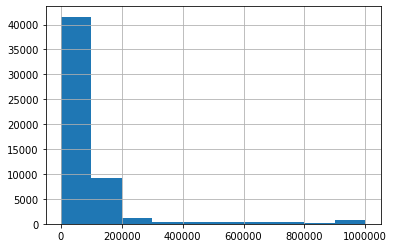

In [45]:
df_19['ConvertedComp'].hist()

In [46]:
df_19['EdLevel'].value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              26394
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           13635
Some college/university study without earning a degree                                 6380
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2801
Associate degree                                                                       1800
Other doctoral degree (Ph.D, Ed.D., etc.)                                              1664
Professional degree (JD, MD, etc.)                                                      737
Primary/elementary school                                                               256
I never completed any formal education                                                  215
Name: EdLevel, dtype: int64

In [47]:
#simplify the edlevel
df_19=df_19.dropna(subset=['EdLevel'])
df_19.loc[df_19['EdLevel'].str.contains("BA"), 'EdLevel'] = "Bachelor's degree"
df_19.loc[df_19['EdLevel'].str.contains("MA"), 'EdLevel'] = "Master's degree"
df_19.loc[df_19['EdLevel'].str.contains("Ph.D"), 'EdLevel'] = "Other doctoral degree"
df_19.loc[df_19['EdLevel'].str.contains("without"), 'EdLevel'] = "Some college/university study without earning a bachelor's degree"
df_19.loc[df_19['EdLevel'].str.contains("Associate degree"), 'EdLevel'] = "Associate degree"
df_19.loc[df_19['EdLevel'].str.contains("JD"), 'EdLevel'] = "Professional degree"
df_19.loc[df_19['EdLevel'].str.contains("Secondary school"), 'EdLevel'] = "Secondary school"




In [48]:
df_19['EdLevel'].value_counts()

Bachelor's degree                                                    40029
Some college/university study without earning a bachelor's degree     6380
Secondary school                                                      2801
Associate degree                                                      1800
Other doctoral degree                                                 1664
Professional degree                                                    737
Primary/elementary school                                              256
I never completed any formal education                                 215
Name: EdLevel, dtype: int64

### ` Developer Survey Results 2020`

In [49]:
#selecting columns
df_20 = df_20[['Respondent', 'Hobbyist', 'Country', 'Employment', 'EdLevel',
       'YearsCode', 'YearsCodePro', 'DevType', 'JobSat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Gender','year','ConvertedComp','Ethnicity','UndergradMajor']]
#dropping missing values
df_20.head()

,Respondent,Hobbyist,Country,Employment,EdLevel,YearsCode,YearsCodePro,DevType,JobSat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,Gender,year,ConvertedComp,Ethnicity,UndergradMajor
0,1,Yes,Germany,"Independent contractor, freelancer, or self-em...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",36,27,"Developer, desktop or enterprise applications;...",Slightly satisfied,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Elasticsearch;Microsoft SQL Server;Oracle,Microsoft SQL Server,Windows,Android;iOS;Kubernetes;Microsoft Azure;Windows,Man,2020,NaN,White or of European descent,"Computer science, computer engineering, or sof..."
1,2,No,United Kingdom,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,4,"Developer, full-stack;Developer, mobile",Very dissatisfied,JavaScript;Swift,Python;Swift,NaN,NaN,iOS,iOS;Kubernetes;Linux;MacOS,NaN,2020,NaN,NaN,"Computer science, computer engineering, or sof..."
2,3,Yes,Russian Federation,NaN,NaN,4,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,2020,NaN,NaN,NaN
3,4,Yes,Albania,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7,4,NaN,Slightly dissatisfied,NaN,NaN,NaN,NaN,NaN,NaN,Man,2020,NaN,White or of European descent,"Computer science, computer engineering, or sof..."
4,5,Yes,United States,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15,8,NaN,NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,AWS;Docker;Linux;MacOS;Windows,Docker;Google Cloud Platform;Heroku;Linux;Windows,Man,2020,NaN,White or of European descent,"Computer science, computer engineering, or sof..."


In [50]:
df_20['Hobbyist'].unique()

array(['Yes', 'No', nan], dtype=object)

In [51]:
df_20=df_20[df_20.ConvertedComp < 1e+6]


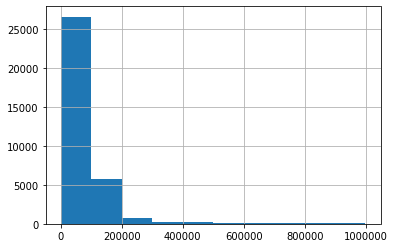

In [52]:
df_20.ConvertedComp.hist()

In [53]:
df_20['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          16509
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        8535
Some college/university study without earning a degree                                 4018
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1449
Associate degree (A.A., A.S., etc.)                                                    1142
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1122
Professional degree (JD, MD, etc.)                                                      473
I never completed any formal education                                                  149
Primary/elementary school                                                               149
Name: EdLevel, dtype: int64

In [54]:
#simplify the edlevel
df_20=df_20.dropna(subset=['EdLevel'])
df_20.loc[df_20['EdLevel'].str.contains("BA"), 'EdLevel'] = "Bachelor's degree"
df_20.loc[df_20['EdLevel'].str.contains("B.A."), 'EdLevel'] = "Bachelor's degree"

df_20.loc[df_20['EdLevel'].str.contains("MA"), 'EdLevel'] = "Master's degree"
df_20.loc[df_20['EdLevel'].str.contains("Ph.D"), 'EdLevel'] = "Other doctoral degree"
df_20.loc[df_20['EdLevel'].str.contains("without"), 'EdLevel'] = "Some college/university study without earning a bachelor's degree"
df_20.loc[df_20['EdLevel'].str.contains("Associate degree"), 'EdLevel'] = "Associate degree"
df_20.loc[df_20['EdLevel'].str.contains("JD"), 'EdLevel'] = "Professional degree"
df_20.loc[df_20['EdLevel'].str.contains("Secondary school"), 'EdLevel'] = "Secondary school"


df_20['EdLevel'].value_counts()

Bachelor's degree                                                    25044
Some college/university study without earning a bachelor's degree     4018
Secondary school                                                      1449
Associate degree                                                      1142
Other doctoral degree                                                 1122
Professional degree                                                    473
I never completed any formal education                                 149
Primary/elementary school                                              149
Name: EdLevel, dtype: int64

# Prepare Data

In [55]:
#combaine the data set 
frames=[df_17,df_18,df_19,df_20]
df=pd.concat(frames,sort=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186632 entries, 0 to 64154
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Respondent              186632 non-null  int64  
 1   Hobbyist                186632 non-null  object 
 2   Country                 186632 non-null  object 
 3   Employment              186313 non-null  object 
 4   EdLevel                 186632 non-null  object 
 5   YearsCode               186439 non-null  object 
 6   YearsCodePro            186353 non-null  object 
 7   DevType                 169973 non-null  object 
 8   JobSat                  186532 non-null  object 
 9   LanguageWorkedWith      169183 non-null  object 
 10  LanguageDesireNextYear  160268 non-null  object 
 11  DatabaseWorkedWith      146716 non-null  object 
 12  DatabaseDesireNextYear  129536 non-null  object 
 13  PlatformWorkedWith      150565 non-null  object 
 14  PlatformDesireNextYea

In [56]:
df.shape

(186632, 20)

In [57]:
df.dtypes

Respondent                  int64
Hobbyist                   object
Country                    object
Employment                 object
EdLevel                    object
YearsCode                  object
YearsCodePro               object
DevType                    object
JobSat                     object
LanguageWorkedWith         object
LanguageDesireNextYear     object
DatabaseWorkedWith         object
DatabaseDesireNextYear     object
PlatformWorkedWith         object
PlatformDesireNextYear     object
Gender                     object
year                        int64
ConvertedComp             float64
Ethnicity                  object
UndergradMajor             object
dtype: object

### Education Level
> We can look at the changes of EdLevel through the years.



In [58]:
#value counts for the educational levels

df['EdLevel'].value_counts()

Bachelor's degree                                                    120783
Some college/university study without earning a bachelor's degree     24853
Secondary school                                                      13501
Master's degree                                                       11141
Associate degree                                                       4476
Other doctoral degree                                                  4009
Professional degree                                                    2565
Primary/elementary school                                              1904
Doctoral degree                                                        1308
I prefer not to answer                                                 1109
I never completed any formal education                                  983
Name: EdLevel, dtype: int64

In [59]:
df.loc[df['EdLevel'].str.contains("without"), 'EdLevel'] = "Study without earning a degree"

#reduced data set 
df_ed=df[df.groupby('EdLevel')['EdLevel'].transform('size') > 2000]


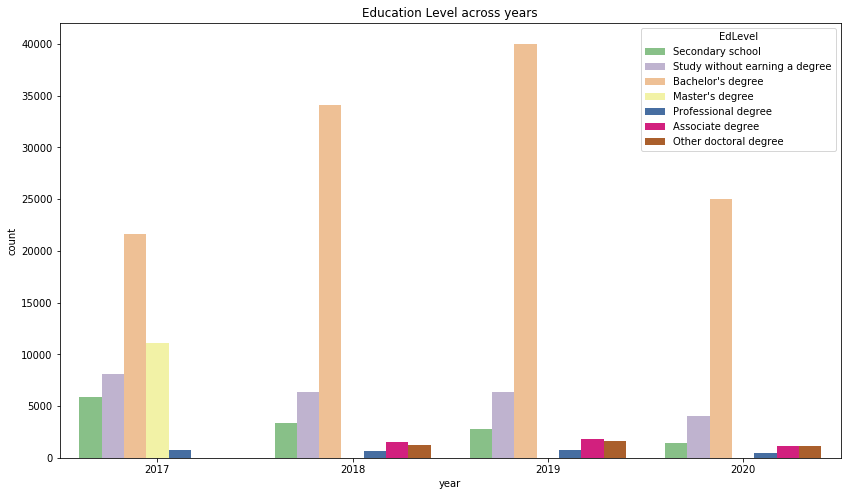

In [60]:
#plot EdLevel through years
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_palette('Accent')
sns.countplot(x="year", hue="EdLevel",data=df_ed)
plt.title('Education Level across years');

> THe majority are at Undergradute level.

### Gender


In [61]:
df['Gender'].nunique()

47

In [62]:
df['Gender'] =df['Gender'].str.split(';').str[0]
df['Gender'].value_counts()

Man                                                  77418
Male                                                 73355
Woman                                                 6073
Female                                                5559
Non-binary, genderqueer, or gender non-conforming      743
Other                                                  225
Transgender                                            181
Gender non-conforming                                  164
Name: Gender, dtype: int64

In [63]:
#Similarly,many repeated phrase that can be reduced and renamed into Male, Female,Non-binary, and Transgender.
df=df.dropna(subset=['Gender'])
df.loc[df['Gender'].str.contains("Woman"), 'Gender'] = 'Female'
df.loc[df['Gender'].str.contains("Man"), 'Gender'] = 'Male'
df['Gender'].value_counts()

Male                                                 150773
Female                                                11632
Non-binary, genderqueer, or gender non-conforming       743
Other                                                   225
Transgender                                             181
Gender non-conforming                                   164
Name: Gender, dtype: int64

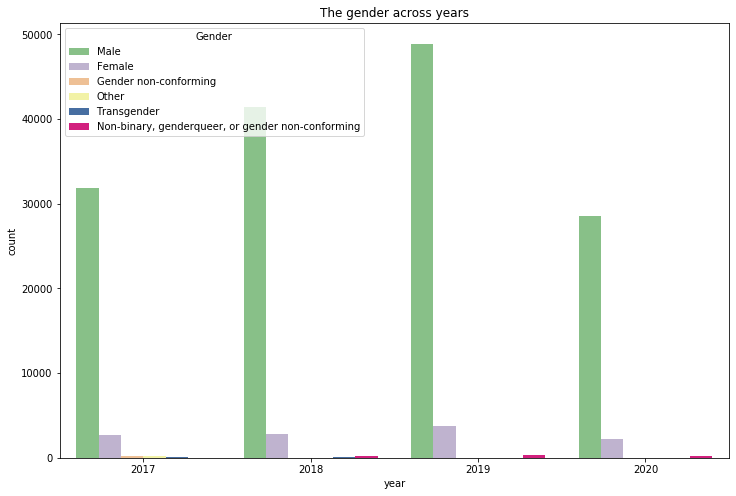

In [64]:
#plot

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.set_palette('Accent')
sns.countplot(x="year", hue="Gender",data=df)
plt.title('The gender across years');

> The participents are overwhelmingly male.

#### Hobbyist

In [65]:
df['Hobbyist'].unique()

array(['No', 'Yes'], dtype=object)

In [66]:
df['Hobbyist'].value_counts()

Yes    121218
No      42500
Name: Hobbyist, dtype: int64

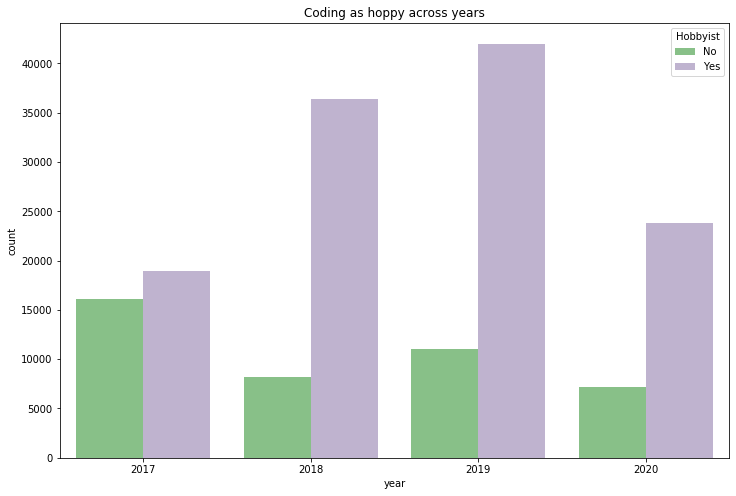

In [67]:
#plot
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.set_palette('Accent')
sns.countplot(x="year", hue="Hobbyist",data=df)
plt.title('Coding as hoppy across years');

#### Employment

In [68]:
df['Employment'].unique()

array(['Not employed, and not looking for work', 'Employed part-time',
       'Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work', 'I prefer not to say',
       'Retired', nan], dtype=object)

In [69]:
df['Employment'].value_counts()

Employed full-time                                      135851
Independent contractor, freelancer, or self-employed     14726
Employed part-time                                        7124
Not employed, but looking for work                        2933
Not employed, and not looking for work                    2264
I prefer not to say                                        408
Retired                                                    135
Name: Employment, dtype: int64

#### Undergrad Major

In [70]:
df=df.dropna(subset=['UndergradMajor'])

#update the values of undergrad major

df.loc[df['UndergradMajor'].str.contains("Humanities"), 'UndergradMajor'] = 'Humanities and social discipline'
df.loc[df['UndergradMajor'].str.contains("humanities"), 'UndergradMajor'] = 'Humanities and social discipline'

df.loc[df['UndergradMajor'].str.contains("business"), 'UndergradMajor'] = 'Business discipline'
df.loc[df['UndergradMajor'].str.contains("Social"), 'UndergradMajor'] = 'Humanities and social discipline'
df.loc[df['UndergradMajor'].str.contains("social"), 'UndergradMajor'] = 'Humanities and social discipline'

df.loc[df['UndergradMajor'].str.contains("health"), 'UndergradMajor'] = 'Health science'
df.loc[df['UndergradMajor'].str.contains('Mathematics' ), 'UndergradMajor'] = 'STEM'
df.loc[df['UndergradMajor'].str.contains('technology'), 'UndergradMajor'] = 'STEM'
df.loc[df['UndergradMajor'].str.contains('natural' ), 'UndergradMajor'] = 'STEM'
df.loc[df['UndergradMajor'].str.contains('engineering' ), 'UndergradMajor'] = 'STEM'
df.loc[df['UndergradMajor'].str.contains('development'), 'UndergradMajor'] = 'STEM'
df.loc[df['UndergradMajor'].str.contains('systems'), 'UndergradMajor'] = 'STEM'
df.loc[df['UndergradMajor'].str.contains('Computer'), 'UndergradMajor'] = 'STEM'
df.loc[df['UndergradMajor'].str.contains('information'), 'UndergradMajor'] = 'STEM'
df.loc[df['UndergradMajor'].str.contains('web'), 'UndergradMajor'] = 'STEM'
df.loc[df['UndergradMajor'].str.contains('arts'), 'UndergradMajor'] = 'Fine arts or performing arts'
df.loc[df['UndergradMajor'].str.contains('Psychology'), 'UndergradMajor'] = 'Health science'
df.loc[df['UndergradMajor'].str.contains('Another engineering discipline'), 'UndergradMajor'] = 'Another engineering discipline'


In [71]:
#test
UndergradMajor= df['UndergradMajor'].value_counts()
UndergradMajor

STEM                                132655
Humanities and social discipline      6102
Business discipline                   3451
Fine arts or performing arts          2428
I never declared a major              1437
Something else                         761
Health science                         619
Name: UndergradMajor, dtype: int64

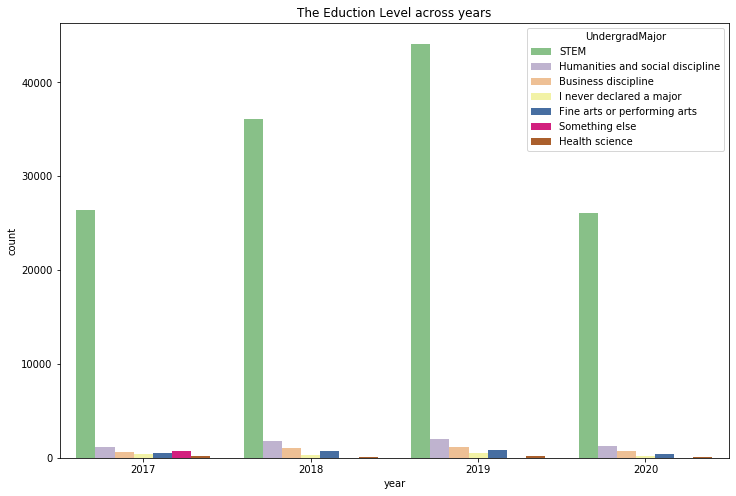

In [72]:
#plot

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.set_palette('Accent')
sns.countplot(x="year", hue="UndergradMajor",data=df)
plt.title('The Eduction Level across years');

#### Years of Coding as Professional  and Years of Coding

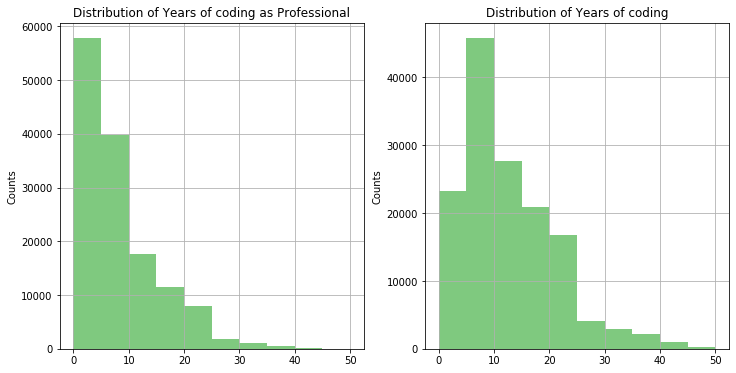

In [73]:
#conv to numeric valuse
df['YearsCodePro']= pd.to_numeric(df["YearsCodePro"], errors='coerce')
df['YearsCode']= pd.to_numeric(df["YearsCode"], errors='coerce')
#plot
plt.figure(figsize = [12, 6])
plt.subplot(1, 2, 1)
df['YearsCodePro'].hist()
plt.title('Distribution of Years of coding as Professional')
plt.ylabel('Counts')
#plot
plt.subplot(1, 2, 2)
df['YearsCode'].hist()
plt.title('Distribution of Years of coding')
plt.ylabel('Counts');

###  YearsCodePro versus YearsCode over years 

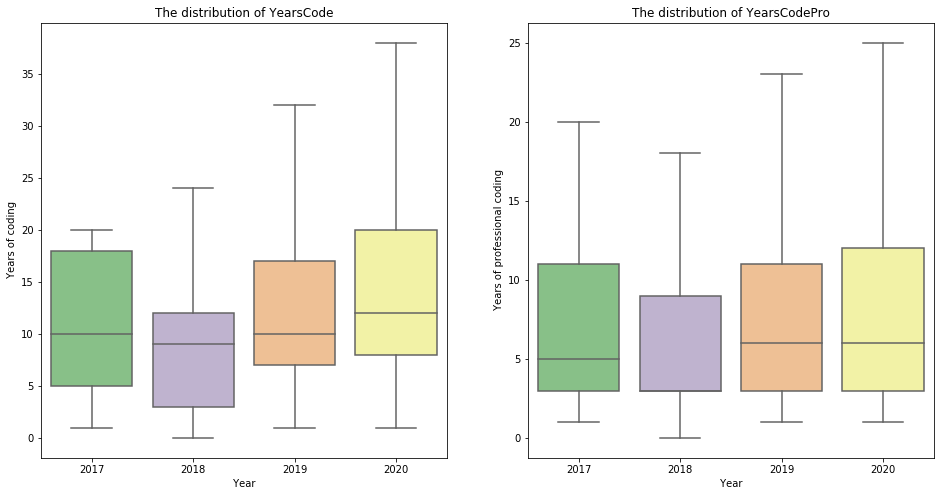

In [74]:
#creating two plots to show the distribution of YearsCode vs YearsCodePro

# left plot: Years coding
plt.figure(figsize = [16, 8])
plt.subplot(1, 2, 1)
sns.boxplot(x="year", y="YearsCode", data=df,showfliers = False)
plt.xlabel(' Year ')
plt.ylabel(' Years of coding')
plt.title('The distribution of YearsCode')

# Right plot: Professional coding
plt.subplot(1, 2, 2)
sns.boxplot(x="year", y="YearsCodePro", data=df,showfliers = False)
plt.xlabel(' Year ')
plt.ylabel(' Years of professional coding')
plt.title('The distribution of YearsCodePro');


#### Salary

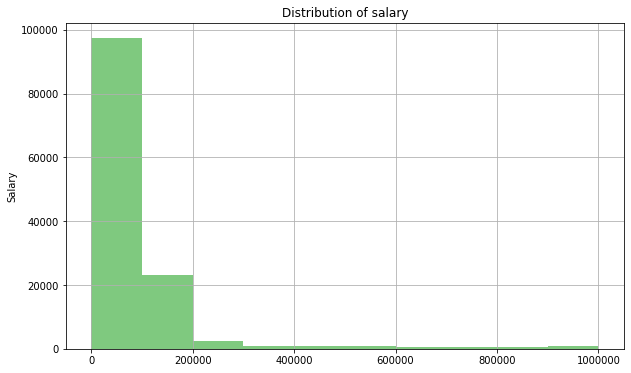

In [75]:
plt.figure(figsize = [10, 6])
df['ConvertedComp'].hist()
plt.ylabel('Salary')
plt.title('Distribution of salary');

Text(0.5, 1.0, 'The distribution of Salary')

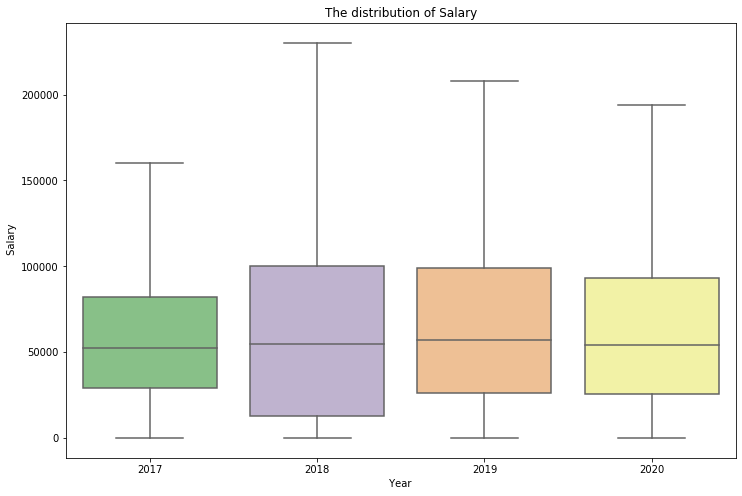

In [76]:
#creating plot to show the distribution salary over years

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.boxplot(x="year", y="ConvertedComp", data=df,showfliers = False)
plt.xlabel(' Year ')
plt.ylabel(' Salary')
plt.title('The distribution of Salary')



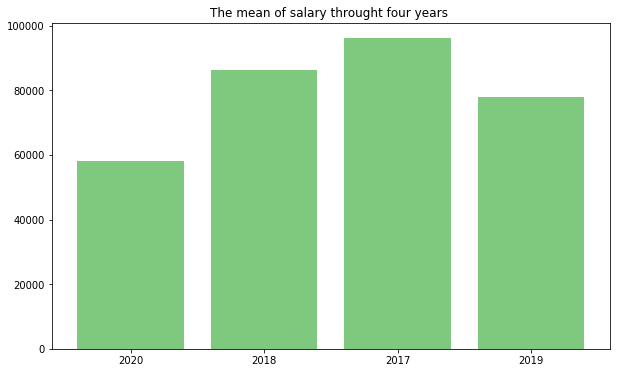

In [77]:
# mean ConvertedComp each year
#making copy
df2 = df.copy()
#dropping all nan
df2.dropna(how='any',inplace=True)
mean_comp = df2.groupby(['year']).mean().sort_values(['ConvertedComp'],ascending=False)
mean_comp=mean_comp.reset_index()
#plot 
plt.figure(figsize = [10, 6])
plt.bar(mean_comp['year'],mean_comp['ConvertedComp'])
plt.xticks(mean_comp['year'], ('2017', '2018', '2019', '2020'))
plt.title('The mean of salary throught four years ');

#### Country

In [78]:
#most country participated in survay 
Countries = df['Country'].value_counts().head(10)
Countries

United States     38755
United Kingdom    11778
India             11191
Germany            9518
Canada             6276
France             4938
Brazil             3705
Poland             3489
Australia          3325
Spain              3127
Name: Country, dtype: int64

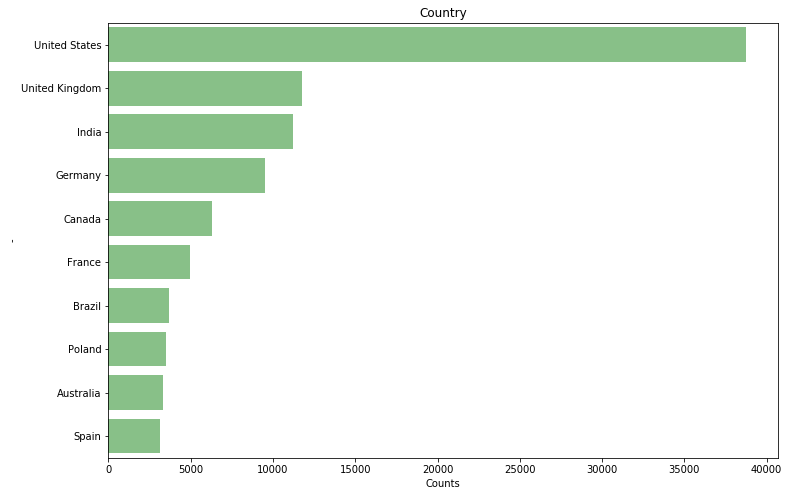

In [79]:
#Top 10 most participated countries in survey 
#plot 
base_color = sns.color_palette()[0]
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.barplot(Countries, Countries.index,color = base_color)
plt.title('Country')
plt.xlabel('Counts')
plt.ylabel('-');

#### Ethnicity

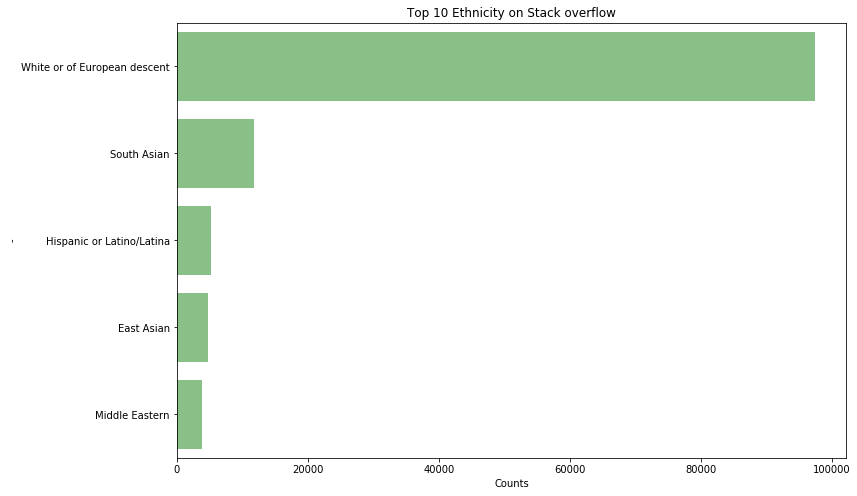

In [80]:
#Top 10 
Ethnic=df['Ethnicity'].value_counts().head(5)

#plot 
base_color = sns.color_palette()[0]
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.barplot(Ethnic, Ethnic.index,color = base_color)
plt.title('Top 10 Ethnicity on Stack overflow')
plt.xlabel('Counts')
plt.ylabel('-');

# Analysing

# How individual's job satisfaction changed over the years?


#### Job Satisfaction

In [81]:
df['JobSat'].unique()

array(['Neither satisfied nor dissatisfied', 'Very satisfied',
       'Slightly dissatisfied', 'Slightly satisfied', 'Very dissatisfied',
       nan], dtype=object)

In [82]:
df['JobSat'].value_counts()

Very satisfied                        67723
Slightly satisfied                    34751
Slightly dissatisfied                 17983
Neither satisfied nor dissatisfied    16213
Very dissatisfied                     10712
Name: JobSat, dtype: int64

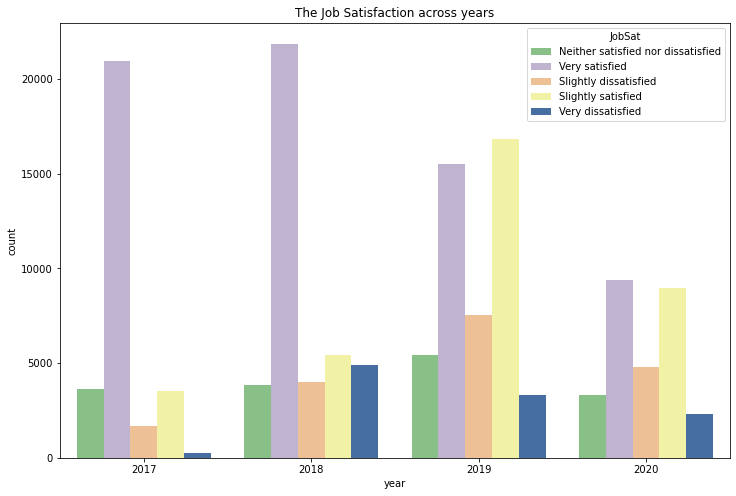

In [83]:
#plot

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.set_palette('Accent')
sns.countplot(x="year", hue="JobSat",data=df)
plt.title('The Job Satisfaction across years');


## What are the changes of salaries and job satisfaction for data scientist?

In [84]:
#filter data science data 
df.dropna(subset=['DevType'],inplace=True)
df_datsci = df[df['DevType'].str.contains('Data scientist')]
df_datsci

,Respondent,Hobbyist,Country,Employment,EdLevel,YearsCode,YearsCodePro,DevType,JobSat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,Gender,year,ConvertedComp,Ethnicity,UndergradMajor
19,20,Yes,Greece,Employed full-time,Doctoral degree,12.0,12.0,Data scientist; Other,Very satisfied,Perl; Python,Perl; Python,MySQL,PostgreSQL,NaN,NaN,Male,2017,NaN,I prefer not to say,STEM
82,83,Yes,United States,Employed full-time,Bachelor's degree,20.0,18.0,Web developer; Mobile developer; Data scientis...,Very satisfied,C++; C#; JavaScript; SQL,C++; C#; JavaScript; R,SQL Server,MongoDB; Redis,Windows Phone; Windows Desktop; Microsoft Azure,Android; iOS; Raspberry Pi; Amazon Web Service...,Male,2017,NaN,White or of European descent,Fine arts or performing arts
91,92,No,Germany,"Not employed, and not looking for work",Master's degree,20.0,10.0,Machine learning specialist; Developer with a ...,Neither satisfied nor dissatisfied,CoffeeScript; Haskell; JavaScript; Python; SQL,Python,MongoDB; Redis; PostgreSQL,Redis; PostgreSQL,Windows Desktop; Linux Desktop; Amazon Web Ser...,Linux Desktop,Male,2017,NaN,White or of European descent,STEM
131,132,No,United States,Employed full-time,Bachelor's degree,18.0,8.0,Web developer; Developer with a statistics or ...,Very satisfied,C++,C++,NaN,NaN,NaN,NaN,Gender non-conforming,2017,NaN,White or of European descent,STEM
143,144,No,United Kingdom,Employed full-time,Bachelor's degree,12.0,1.0,Web developer; Graphics programming; Developer...,Slightly satisfied,C++; C#; F#; Haskell; Python; SQL,C; C++; C#; F#; Python; TypeScript,SQL Server,NaN,Windows Desktop; Arduino; Raspberry Pi,Windows Desktop; Linux Desktop; Raspberry Pi,Male,2017,43750.0,White or of European descent,STEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61564,62812,Yes,United States,Employed full-time,Associate degree,30.0,20.0,Data or business analyst;Data scientist or mac...,Very satisfied,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Perl...,Cassandra;MariaDB;Microsoft SQL Server;MongoDB...,Cassandra;Elasticsearch;MariaDB;Microsoft SQL ...,Android;AWS;Docker;Google Cloud Platform;IBM C...,Android;AWS;Docker;Google Cloud Platform;IBM C...,Male,2020,145000.0,White or of European descent,STEM
61586,62835,Yes,Russian Federation,Employed full-time,Bachelor's degree,8.0,3.0,Data scientist or machine learning specialist;...,Very satisfied,Bash/Shell/PowerShell;C;C#;C++;Go;Haskell;Kotl...,C#;Haskell;Rust;Scala;SQL,PostgreSQL;Redis,Cassandra;PostgreSQL;Redis,Docker;Kubernetes;Slack Apps and Integrations,Docker;Kubernetes,Male,2020,33972.0,White or of European descent,STEM
61588,62837,Yes,Germany,Employed full-time,Bachelor's degree,12.0,2.0,Data scientist or machine learning specialist;...,Very satisfied,C++;Python;Rust,Assembly;Haskell;Rust,NaN,NaN,AWS;Docker;Linux,AWS;Docker;Kubernetes;Linux,Male,2020,97284.0,White or of European descent,STEM
61617,62867,Yes,Panama,Employed full-time,Bachelor's degree,15.0,2.0,Data or business analyst;Data scientist or mac...,Very satisfied,JavaScript;Python;SQL,Python;R;Ruby,MariaDB;Microsoft SQL Server;MongoDB;SQLite,NaN,AWS;Google Cloud Platform;Windows,NaN,Male,2020,72000.0,Hispanic or Latino/a/x,STEM


#### Aveage Salary for Data Science

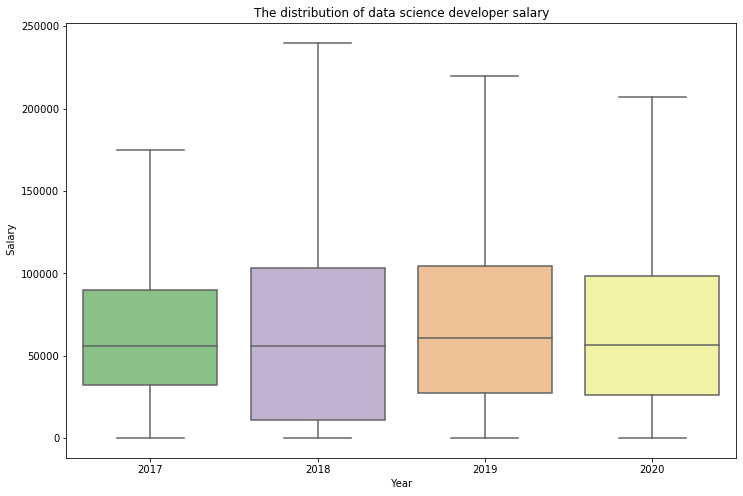

In [85]:
#distribution of salary 

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.boxplot(x="year", y="ConvertedComp", data=df_datsci,showfliers = False)
plt.xlabel(' Year ')
plt.ylabel(' Salary')
plt.title('The distribution of data science developer salary');



#### Job satisfaction for data science

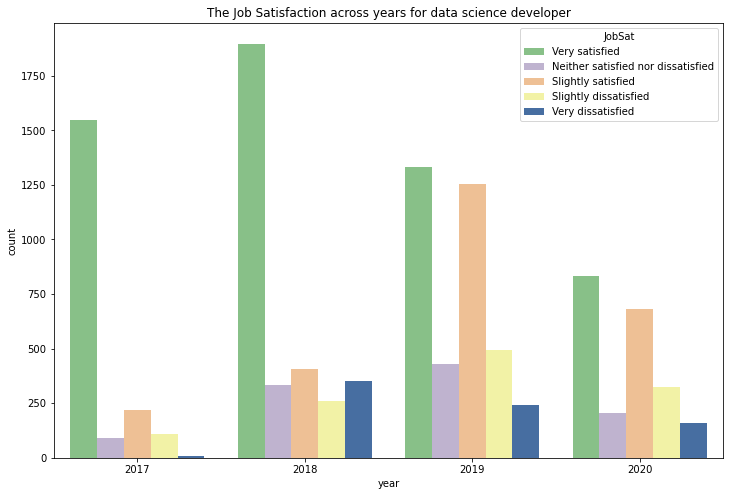

In [86]:
#plot

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.set_palette('Accent')
sns.countplot(x="year", hue="JobSat",data=df_datsci)
plt.title('The Job Satisfaction across years for data science developer');

# Does race and gender or education level matter more to an individual's salary?

In [87]:
#dropping nan
df.dropna(how='any',inplace=True)
#create a column to cal the average salary based on 'EdLevel','Gender','Ethnicity','UndergradMajor'
df['Compa_verage'] = df.groupby(['EdLevel','Gender','Ethnicity','UndergradMajor'])['ConvertedComp'].transform(lambda x : x.mean())


In [88]:
#filttering data to focous on the major 5 Ethnicity in stack
in_ethnic=[ x for x in df['Ethnicity'] if x in Ethnic]
df_ethnic = df[df['Ethnicity'].isin(in_ethnic)]
df_ethnic=df_ethnic.query( 'Gender == "Male" or Gender == "Female"')



<Figure size 1296x1296 with 0 Axes>

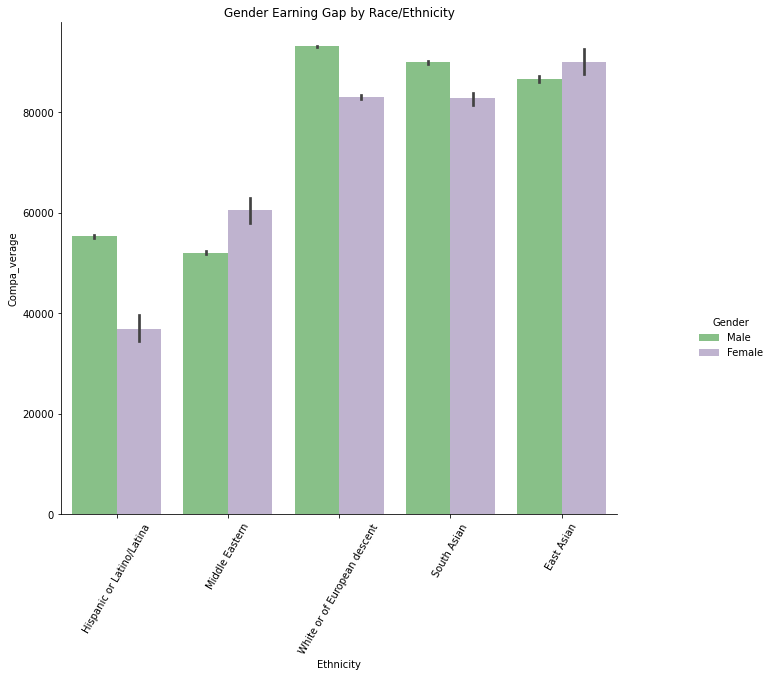

In [89]:
#plot the gender gap accros Ethnicity
plt.figure(figsize=(18,18))
sns.catplot(x="Ethnicity", y="Compa_verage", hue="Gender", data=df_ethnic,kind="bar")
plt.xticks(rotation=60)
plt.gcf().set_size_inches(12, 8)
plt.title('Gender Earning Gap by Race/Ethnicity');



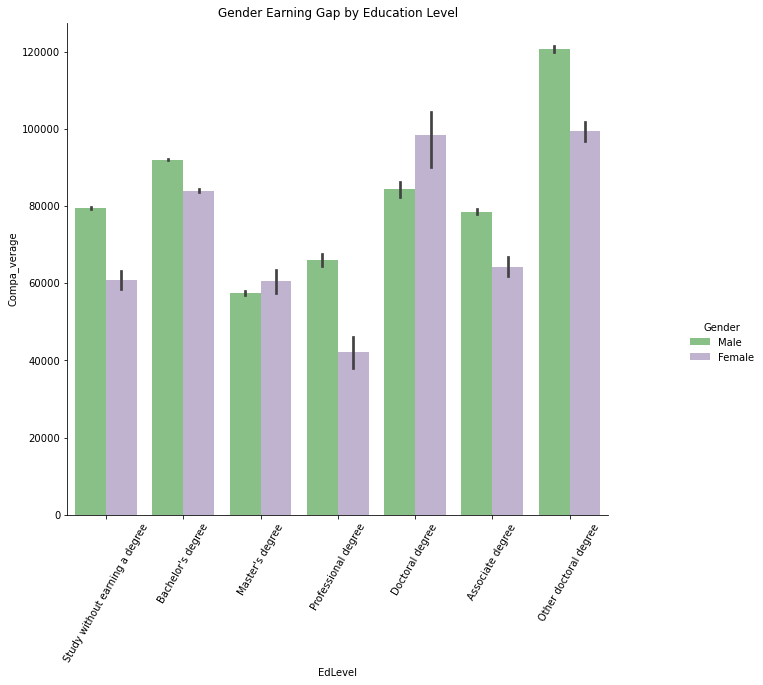

In [90]:
#plot the gender gap accros Ed Level
sns.catplot(x="EdLevel", y="Compa_verage", hue="Gender", data=df_ethnic, kind="bar")
plt.xticks(rotation=60)
plt.gcf().set_size_inches(12, 8)
plt.title('Gender Earning Gap by Education Level');

## Modeling 

> We can use 'Hobbyist',"Employment_answer",'Ed_Level','YearsCode','YearsCodePro',and 'ConvertedComp' to attemp predicting the jobsatisfaction.

> First we must deal with catagories data, then we can start modeling.

In [91]:
#making copy
df1 = df.copy()
#dropping all nan 
#catagical values is hard to impute its missing values
df1.dropna(how='any',inplace=True)
#convert into dummies 
df1['Hobbyist'] =pd.get_dummies(df1['Hobbyist'])
#using LabelEncoder to encode categorical features as a one-hot numeric
label = LabelEncoder()
df1["Employment_answer"] = label.fit_transform(df1["Employment"])
df1[["Employment", "Employment_answer"]]
df1["JobSat_answer"] = label.fit_transform(df1["JobSat"])
df1[['JobSat', 'JobSat_answer']]
df1['Ed_Level'] = label.fit_transform(df1['EdLevel'])
df1[['EdLevel', 'Ed_Level']]
df1['Year'] = label.fit_transform(df1['year'])
df1[['year', 'Year']];

In [92]:
#Gaussian Naive Bayes (GaussianNB)
#define x and y 
X= df1[['Hobbyist',"Employment_answer",'Ed_Level','YearsCode','YearsCodePro','ConvertedComp']]
Y = df1['JobSat']
#split data
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.5,random_state=0)
#define model
clf= GaussianNB()
#fitting
clf.fit(X_train,y_train)
#predicting
y_pred=clf.predict(X_test)
#accuracy
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
"Accuracy:",metrics.accuracy_score(y_test, y_pred)

Number of mislabeled points out of a total 37434 points : 22131


('Accuracy:', 0.40879948709729125)

> The accuracy is low, but this model can be improved if we have more survey answer that related to job satisfaction factors. 
